# *Imports*

In [1]:
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import itertools
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# *Preprocessing*

In [2]:
df = pd.read_csv("Dataset.txt")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
df.shape

(125973, 43)

In [4]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category', 'occurance'],
      dtype='object')

In [5]:
df['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [6]:
df['attack_category'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_category, dtype: int64

In [7]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
125968    False
125969    False
125970    False
125971    False
125972    False
Length: 125973, dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [10]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [11]:
df.describe(include='object')

,protocol_type,service,flag,attack_category
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


<AxesSubplot: xlabel='protocol_type', ylabel='count'>

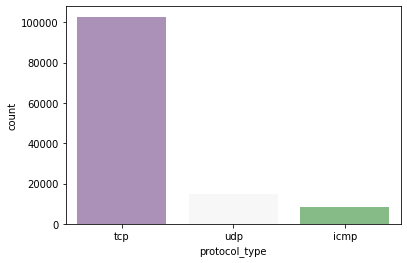

In [12]:
sns.countplot(data=df,x='protocol_type',palette='PRGn')

<AxesSubplot: xlabel='protocol_type', ylabel='count'>

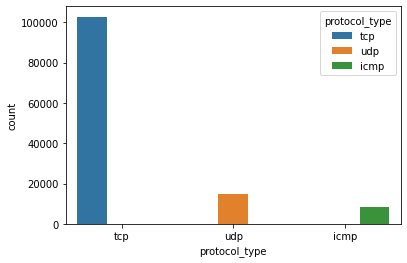

In [13]:
sns.countplot(data=df, x="protocol_type", hue="protocol_type")

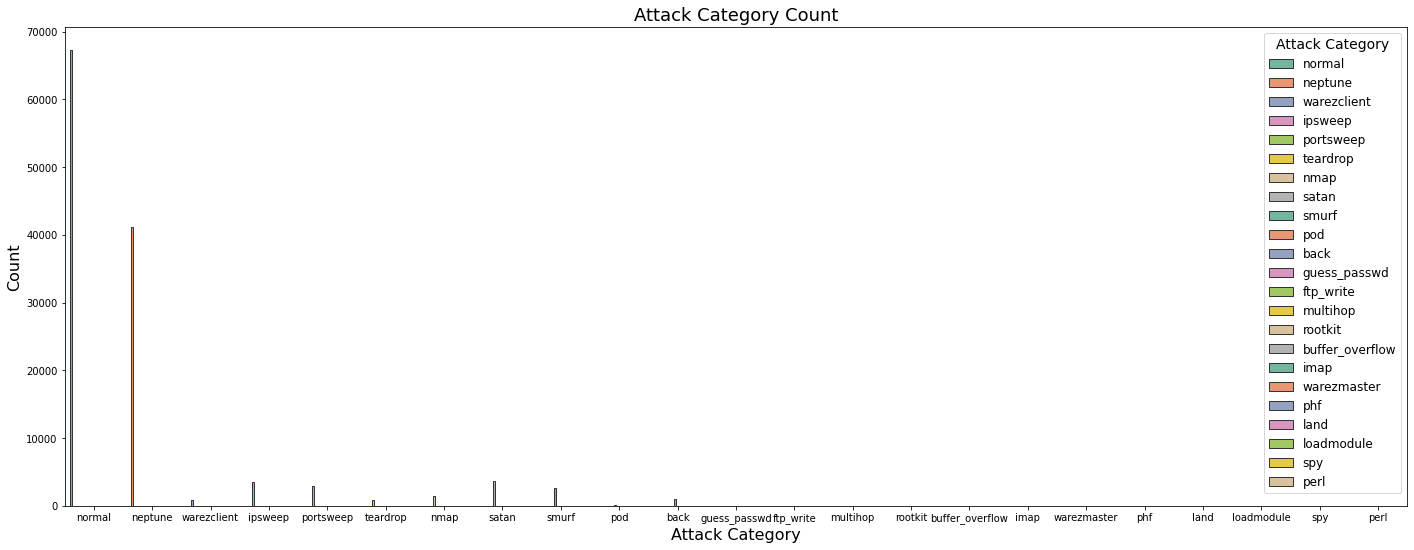

In [14]:
plt.figure(figsize=(20, 8)) # Set the figure size
sns.countplot(data=df, x="attack_category", hue="attack_category", palette="Set2", 
              edgecolor="0.2") # Create the countplot with desired parameters
plt.title("Attack Category Count", fontsize=18) # Add a title to the plot
plt.xlabel("Attack Category", fontsize=16) # Add a label to the x-axis
plt.ylabel("Count", fontsize=16) # Add a label to the y-axis
plt.legend(title="Attack Category", fontsize=12, title_fontsize=14, loc="upper right") # Add a legend
#sns.despine() # Remove the top and right spines
plt.tight_layout(pad=2) # Add extra spacing between the plot and the axes
plt.show() # Display the plot


In [15]:
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [16]:
# By analyzing we come to know that num_outbound_cmds has only zeros therefore removing them
df.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [17]:
df.shape

(125973, 42)

# *Reading 2nd file*

In [18]:
data = pd.read_csv("Attack_types.txt")
data.head()

,attack_category attack_type
0,apache2 dos
1,back dos
2,mailbomb dos
3,processtable dos
4,snmpgetattack dos


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   attack_category attack_type  41 non-null     object
dtypes: object(1)
memory usage: 456.0+ bytes


In [20]:
# Redistribute across common attack class
def change_label(df):
    df.attack_category.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.attack_category.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
    df.attack_category.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.attack_category.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [21]:
change_label(df)

In [22]:
# attack_category of attack classes
df.attack_category.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: attack_category, dtype: int64

In [23]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# *Enconding and Grouping attack_category into 5 attack_category*

In [24]:
# Initialize the label encoder
le = preprocessing.LabelEncoder()

# Encode the target column
df['attack_category'] = le.fit_transform(df['attack_category'])
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])

# Print the encoded values
print(df['attack_category'].unique())


[4 0 2 1 3]


In [25]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,4,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,21


In [26]:
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
count,125973.00000,125973.000000,125973.000000,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,1.053202,31.226469,6.979996,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,...,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,2.247894,19.504060
std,2604.51531,0.426620,16.346470,2.689365,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,...,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,1.904773,2.291503
min,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,20.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,1.000000,24.000000,9.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,20.000000
75%,0.00000,1.000000,49.000000,9.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,4.000000,21.000000
max,42908.00000,2.000000,69.000000,10.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,21.000000


#  *Correlation Analysis before Scaling*

In [27]:
# Compute the correlation matrix
correlation_matrix = df.corr()

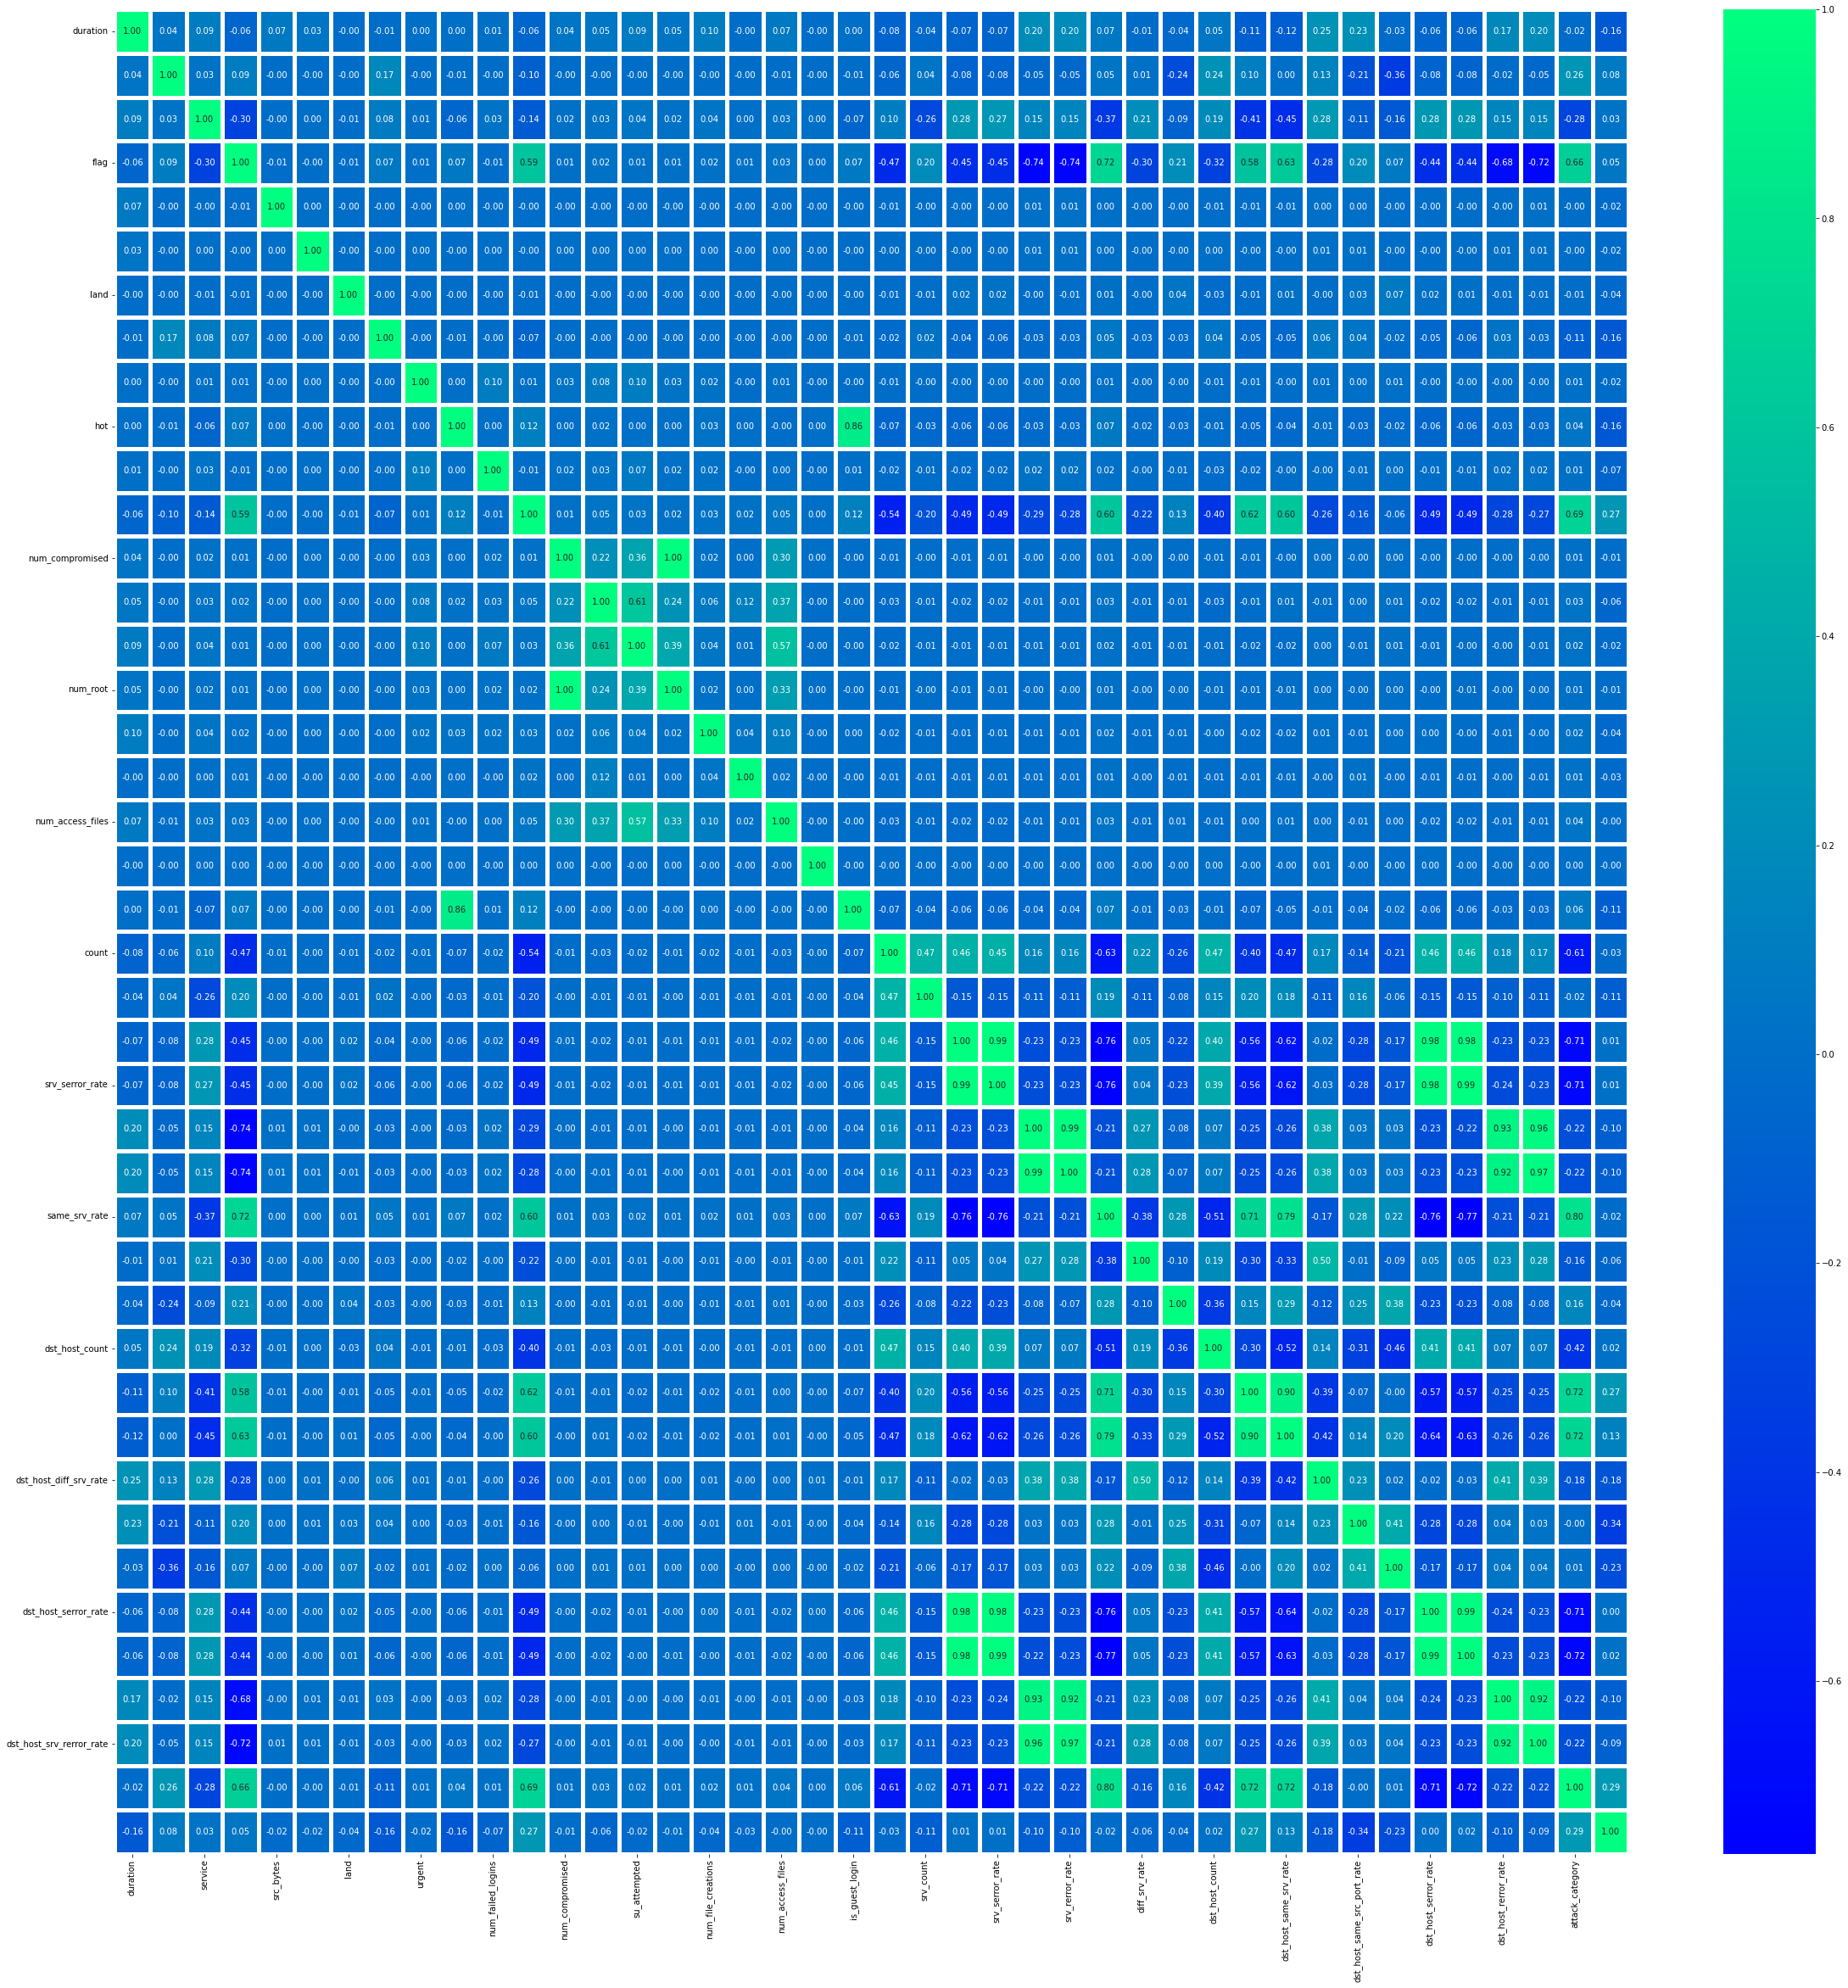

In [28]:
import seaborn as sns

# Plot the correlation matrix
heatmap = sns.heatmap(correlation_matrix, cmap="winter", cbar=True, linewidths=5, annot=True, fmt=".2f")

# Set the size of the heatmap
heatmap.figure.set_size_inches(40, 40)

# Show the heatmap
plt.show()

In [29]:
# Select the top 10 correlated features with the target variable
top_corr_features = correlation_matrix.nlargest(20, 'attack_category')['attack_category'].index
print(top_corr_features)
# Subset the dataframe with the selected features
selected_features_df = df[top_corr_features]


Index(['attack_category', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'logged_in', 'flag', 'occurance',
       'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'hot',
       'num_access_files', 'root_shell', 'num_file_creations', 'su_attempted',
       'num_shells', 'num_failed_logins', 'num_root', 'num_compromised',
       'dst_host_srv_diff_host_rate'],
      dtype='object')


<AxesSubplot: >

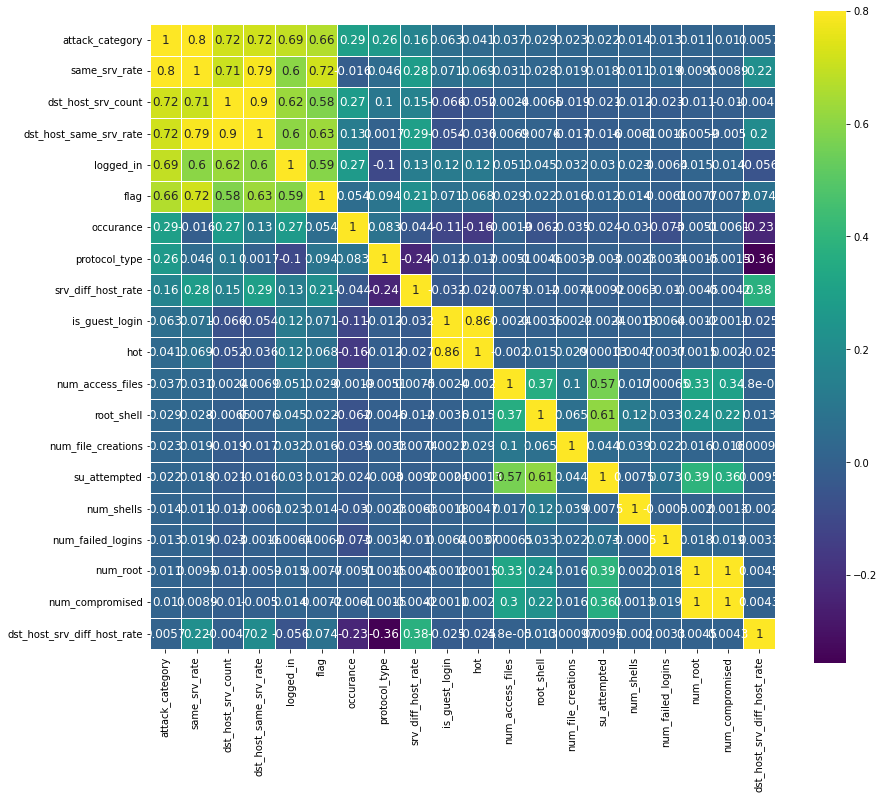

In [30]:
cm =np.corrcoef(df[top_corr_features].values.T)
f , ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm, vmax=0.8, linewidths=0.5, square= True, annot=True, cmap='viridis',
           linecolor='White', xticklabels=top_corr_features.values, annot_kws = {'size':12}, yticklabels= top_corr_features.values)

In [31]:
selected_features_df.head()

,attack_category,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,occurance,protocol_type,srv_diff_host_rate,is_guest_login,hot,num_access_files,root_shell,num_file_creations,su_attempted,num_shells,num_failed_logins,num_root,num_compromised,dst_host_srv_diff_host_rate
0,4,1.00,25,0.17,0,9,20,1,0.00,0,0,0,0,0,0,0,0,0,0,0.00
1,4,0.08,1,0.00,0,9,15,2,0.00,0,0,0,0,0,0,0,0,0,0,0.00
2,0,0.05,26,0.10,0,5,19,1,0.00,0,0,0,0,0,0,0,0,0,0,0.00
3,4,1.00,255,1.00,1,9,21,1,0.00,0,0,0,0,0,0,0,0,0,0,0.04
4,4,1.00,255,1.00,1,9,21,1,0.09,0,0,0,0,0,0,0,0,0,0,0.00


In [32]:
X_train = selected_features_df.drop(['attack_category'], axis=1)
Y_train = selected_features_df['attack_category']

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   same_srv_rate                125973 non-null  float64
 1   dst_host_srv_count           125973 non-null  int64  
 2   dst_host_same_srv_rate       125973 non-null  float64
 3   logged_in                    125973 non-null  int64  
 4   flag                         125973 non-null  int64  
 5   occurance                    125973 non-null  int64  
 6   protocol_type                125973 non-null  int64  
 7   srv_diff_host_rate           125973 non-null  float64
 8   is_guest_login               125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_access_files             125973 non-null  int64  
 11  root_shell                   125973 non-null  int64  
 12  num_file_creations           125973 non-null  int64  
 13 

#### By analysis through heatmap we have selected the following features for our models

In [34]:
selected_features = ['same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'logged_in',
 'flag',
 'occurance',
 'protocol_type',
 'srv_diff_host_rate',
 'is_guest_login',
 'hot',
 'root_shell',
 'num_failed_logins',
 'num_root',
 'num_compromised',
 'dst_host_srv_diff_host_rate']

In [35]:
X_train = X_train[selected_features]
X_train.columns

Index(['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'logged_in', 'flag', 'occurance', 'protocol_type', 'srv_diff_host_rate',
       'is_guest_login', 'hot', 'root_shell', 'num_failed_logins', 'num_root',
       'num_compromised', 'dst_host_srv_diff_host_rate'],
      dtype='object')

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   same_srv_rate                125973 non-null  float64
 1   dst_host_srv_count           125973 non-null  int64  
 2   dst_host_same_srv_rate       125973 non-null  float64
 3   logged_in                    125973 non-null  int64  
 4   flag                         125973 non-null  int64  
 5   occurance                    125973 non-null  int64  
 6   protocol_type                125973 non-null  int64  
 7   srv_diff_host_rate           125973 non-null  float64
 8   is_guest_login               125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  root_shell                   125973 non-null  int64  
 11  num_failed_logins            125973 non-null  int64  
 12  num_root                     125973 non-null  int64  
 13 

In [37]:
X_train.shape

(125973, 15)

In [38]:
Y_train.shape

(125973,)

In [39]:
X_train.head(10)

,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,occurance,protocol_type,srv_diff_host_rate,is_guest_login,hot,root_shell,num_failed_logins,num_root,num_compromised,dst_host_srv_diff_host_rate
0,1.00,25,0.17,0,9,20,1,0.00,0,0,0,0,0,0,0.00
1,0.08,1,0.00,0,9,15,2,0.00,0,0,0,0,0,0,0.00
2,0.05,26,0.10,0,5,19,1,0.00,0,0,0,0,0,0,0.00
3,1.00,255,1.00,1,9,21,1,0.00,0,0,0,0,0,0,0.04
4,1.00,255,1.00,1,9,21,1,0.09,0,0,0,0,0,0,0.00
5,0.16,19,0.07,0,1,21,1,0.00,0,0,0,0,0,0,0.00
6,0.05,9,0.04,0,5,21,1,0.00,0,0,0,0,0,0,0.00
7,0.14,15,0.06,0,5,21,1,0.00,0,0,0,0,0,0,0.00
8,0.09,23,0.09,0,5,21,1,0.00,0,0,0,0,0,0,0.00
9,0.06,13,0.05,0,5,21,1,0.00,0,0,0,0,0,0,0.00


In [40]:
Y_train.head(10)

0    4
1    4
2    0
3    4
4    4
5    0
6    0
7    0
8    0
9    0
Name: attack_category, dtype: int64

# *Feature Scaling and Splitting*

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.30, random_state=42)

In [44]:
X_train.shape

(88181, 15)

In [45]:
X_test.shape

(37792, 15)

In [46]:
y_train.shape

(88181,)

In [47]:
y_test.shape

(37792,)

# *KNN*

In [48]:
from sklearn.neighbors import KNeighborsClassifier
# Assuming X_train and Y_train are already defined
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
y_pred = knn.predict(X_test)

<AxesSubplot: >

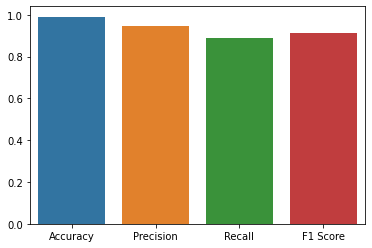

In [53]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])


In [54]:
print("KNN Object different stats!")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average=None))
print('Recall:', recall_score(y_test, y_pred, average=None))
print('F1 score:', f1_score(y_test, y_pred, average=None))


KNN Object different stats!
Accuracy: 0.9910298475867908
Precision: [0.99254164 0.9553696  0.96048632 0.81818182 0.99695867]
Recall: [0.99146474 0.96751412 0.96636086 0.52941176 0.99566798]
F1 score: [0.99200289 0.96140351 0.96341463 0.64285714 0.9963129 ]
